In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Wavelet + Hand Movement

## Load Data

In [ ]:
df_time=pd.read_csv("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/all_persons_features.csv")
df1=pd.read_csv("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/Emotiv_Right_gyro_extracted.csv").iloc[:,1:]
df2=pd.read_csv("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/Emotiv_Right_acc_extracted.csv").iloc[:,1:]

In [ ]:
df_time.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,Test
0,23912.058097,-5.090786,-1.491028,-1.816503,-0.039856,0.004918,23943.333260,-0.557060,0.276885,0.129997,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,EEG_Test0_1
1,23938.140667,1.304878,0.523035,-0.000734,0.138114,-0.000725,23930.166019,1.371697,0.204861,0.088420,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,EEG_Test0_2
2,23963.298887,1.335970,0.798692,-0.751814,0.339526,-0.006397,23938.108961,1.472247,0.180649,0.032136,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,EEG_Test0_3
3,23969.644167,-4.001203,-0.188962,0.233066,-0.401017,0.000301,23951.036319,1.713476,-0.229397,-0.216472,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,EEG_Test0_4
4,23951.364927,0.655335,-0.060575,0.085118,-0.195425,-0.003415,23945.335025,0.015047,-0.225376,0.024856,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,EEG_Test0_5


In [ ]:
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_time_filtered = df_time[~df_time['Test'].str.contains('|'.join(rows_to_drop))]
df_time_filtered

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,Test
0,23912.058097,-5.090786,-1.491028,-1.816503,-0.039856,0.004918,23943.333260,-0.557060,0.276885,0.129997,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,EEG_Test0_1
1,23938.140667,1.304878,0.523035,-0.000734,0.138114,-0.000725,23930.166019,1.371697,0.204861,0.088420,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,EEG_Test0_2
2,23963.298887,1.335970,0.798692,-0.751814,0.339526,-0.006397,23938.108961,1.472247,0.180649,0.032136,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,EEG_Test0_3
3,23969.644167,-4.001203,-0.188962,0.233066,-0.401017,0.000301,23951.036319,1.713476,-0.229397,-0.216472,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,EEG_Test0_4
4,23951.364927,0.655335,-0.060575,0.085118,-0.195425,-0.003415,23945.335025,0.015047,-0.225376,0.024856,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,23980.416319,0.491757,0.100662,-0.019101,-0.101720,0.003762,23989.717301,0.167613,-0.074636,-0.118257,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,EEG_Test26_4
212,23929.524102,1.511335,0.700155,0.129721,0.184296,0.004997,23922.768185,0.898569,0.195001,0.151714,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,EEG_Test26_5
213,23951.673480,-1.582431,0.758108,-0.096076,0.126605,0.003738,23946.983749,-0.149871,0.069997,-0.046927,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,EEG_Test26_6
214,23965.454197,-1.797909,-0.710798,-0.041174,-0.015499,0.002591,23960.840545,0.202264,0.051962,-0.127439,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,EEG_Test26_7


In [ ]:
metadata=pd.read_excel("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]
metadata.head()

,User ID,Age,Gender,Dominant Hand,Date / Time,Video ID 1,Video ID 2,Date / Time,Video ID 3,Video ID 4
0,Test0,27,Male,Right,08/18/2019/2:00:00 PM,15,8,08/23/2019/3:40:00 PM,2.0,11.0
1,Test1,24,Male,Right,08/18/2019/3:20:00 PM,5,5,08/22/2019/4:30:00 PM,9.0,5.0
2,test2,30,Female,Right,08/19/2019/4:20:00 PM,8,11,08/20/2019/4:40:00 PM,5.0,2.0
3,test3,25,Male,Right,08/20/2019/1:28:00 PM,14,7,08/28/2019/3:15:00 PM,15.0,1.0
4,test4,24,Male,Left,08/21/2019/3:20:00 PM,12,6,08/30/2019/5:10:00 PM,15.0,19.0


In [ ]:
metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()
metadata_video_id.head()

,User ID,Video ID 1,Video ID 2,Video ID 3,Video ID 4
0,Test0,15,8,2.0,11.0
1,Test1,5,5,9.0,5.0
2,test2,8,11,5.0,2.0
3,test3,14,7,15.0,1.0
4,test4,12,6,15.0,19.0


In [ ]:
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)] #to int and double the time
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list] #map
df_time_filtered["Emotion"]=metadata_video_id_list

<ipython-input-76-00e5abdab353>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_filtered["Emotion"]=metadata_video_id_list


In [ ]:
df_time_filtered=df_time_filtered.drop(columns=["Test"])
df_time_filtered

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,Emotion
0,23912.058097,-5.090786,-1.491028,-1.816503,-0.039856,0.004918,23943.333260,-0.557060,0.276885,0.129997,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,1
1,23938.140667,1.304878,0.523035,-0.000734,0.138114,-0.000725,23930.166019,1.371697,0.204861,0.088420,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,1
2,23963.298887,1.335970,0.798692,-0.751814,0.339526,-0.006397,23938.108961,1.472247,0.180649,0.032136,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,0
3,23969.644167,-4.001203,-0.188962,0.233066,-0.401017,0.000301,23951.036319,1.713476,-0.229397,-0.216472,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,0
4,23951.364927,0.655335,-0.060575,0.085118,-0.195425,-0.003415,23945.335025,0.015047,-0.225376,0.024856,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,23980.416319,0.491757,0.100662,-0.019101,-0.101720,0.003762,23989.717301,0.167613,-0.074636,-0.118257,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,1
212,23929.524102,1.511335,0.700155,0.129721,0.184296,0.004997,23922.768185,0.898569,0.195001,0.151714,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,0
213,23951.673480,-1.582431,0.758108,-0.096076,0.126605,0.003738,23946.983749,-0.149871,0.069997,-0.046927,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,0
214,23965.454197,-1.797909,-0.710798,-0.041174,-0.015499,0.002591,23960.840545,0.202264,0.051962,-0.127439,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,1


## Train Test Split Method

In [ ]:
folder = [num for num in range(1, 26) for _ in range(8)]
df_time_filtered["Folder"]=folder
df_time_filtered = df_time_filtered.reset_index().iloc[:,1:]
df_time_filtered = pd.concat([df1, df2,df_time_filtered], axis=1)
df_time_filtered

,X_mean,X_std,X_var,X_median,X_min,X_max,X_activity,X_mobility,X_complexity,X_ar_coeff_0,...,70,71,72,73,74,75,76,77,Emotion,Folder
0,0.001607,0.260157,0.067681,0.000000,-4.112247,6.810244,0.067681,0.070913,11.022582,1.479198,...,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,1,1
1,0.002963,0.190770,0.036393,0.000000,-1.800440,3.523642,0.036393,0.163308,4.630067,1.432209,...,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,1,1
2,0.003272,0.080315,0.006451,0.000000,-1.155904,1.382290,0.006451,0.138448,5.409588,1.509037,...,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,0,1
3,0.002472,0.215988,0.046651,0.000000,-2.309144,3.094839,0.046651,0.156288,4.574221,1.478410,...,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,0,1
4,0.002084,0.129437,0.016754,0.000000,-4.604971,2.293164,0.016754,0.128519,5.819786,1.442986,...,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.002367,0.362788,0.131615,0.000000,-6.405411,9.138031,0.131615,0.136926,5.896235,1.378736,...,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,1,25
196,0.002305,0.318483,0.101431,0.000000,-9.311151,7.843632,0.101431,0.080000,9.567558,1.399219,...,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,0,25
197,0.002467,0.292631,0.085633,0.002663,-3.483691,3.523642,0.085633,0.153498,5.261906,1.419619,...,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,0,25
198,-0.000201,0.581372,0.337993,0.000000,-13.375457,8.919635,0.337993,0.089421,9.561830,1.303011,...,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,1,25


In [ ]:
import random
folder_names = [i for i in range(1, 27)]
random.shuffle(folder_names)
train_split = int(0.8 * len(folder_names))
train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

In [ ]:
train_time = df_time_filtered[df_time_filtered['Folder'].isin(train_folders)]
X_train_time =train_time.iloc[:,:-2]
y_train_time=train_time.iloc[:,-2]

test_time = df_time_filtered[df_time_filtered['Folder'].isin(test_folders)]
X_test_time =test_time.iloc[:,:-2]
y_test_time=test_time.iloc[:,-2]

## DNN model + Cross Validation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LambdaCallback
from sklearn.metrics import accuracy_score

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_shape,), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

batch_size=64

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback
from sklearn.metrics import accuracy_score
cv_scores = []
best_model_time = 0
best_accuracy_time = 0
train_folders_name=train_folders

for i in range(5):
    random.shuffle(train_folders_name)
    train_split_cv = int(0.9 * len(train_folders_name))
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]
    train_cv = train_time[train_time['Folder'].isin(train_folders_cv)]
    X_train_cv =train_cv.iloc[:,:-2]
    y_train_cv=train_cv.iloc[:,-2]
    val_cv = train_time[train_time['Folder'].isin(val_folders_cv)]
    X_val_cv =val_cv.iloc[:,:-2]
    y_val_cv=val_cv.iloc[:,-2]
    model_time = create_model(X_train_cv.shape[1])
    print_callback = LambdaCallback(on_epoch_end=lambda epoch, logs:
                                    print(f"Epoch: {epoch+1}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")
                                    if (epoch+1) % 20 == 0 else None)

    history = model_time.fit(X_train_cv, y_train_cv,
                             epochs=100,
                             batch_size=batch_size,
                             verbose=0,
                             callbacks=[print_callback],
                             validation_data=(X_val_cv, y_val_cv))

    val_predictions = (model_time.predict(X_val_cv) > 0.5).astype("int32")
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_time:
        best_accuracy_time = val_accuracy
        best_model_time = model_time

print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")


Epoch: 20, Loss: 416.9542, Accuracy: 0.4779
Epoch: 40, Loss: 100.8199, Accuracy: 0.4632
Epoch: 60, Loss: 23.1603, Accuracy: 0.4853
Epoch: 80, Loss: 7.8216, Accuracy: 0.5368
Epoch: 100, Loss: 5.5191, Accuracy: 0.5735
1/1 [==============================] - 0s 67ms/step
Fold completed. Validation accuracy: 25.00%
Epoch: 20, Loss: 267.5338, Accuracy: 0.5368
Epoch: 40, Loss: 143.3795, Accuracy: 0.4926
Epoch: 60, Loss: 40.1025, Accuracy: 0.4559
Epoch: 80, Loss: 47.2107, Accuracy: 0.4559
Epoch: 100, Loss: 5.7930, Accuracy: 0.5368
1/1 [==============================] - 0s 74ms/step
Fold completed. Validation accuracy: 37.50%
Epoch: 20, Loss: 356.7770, Accuracy: 0.5294
Epoch: 40, Loss: 97.6700, Accuracy: 0.5294
Epoch: 60, Loss: 1.0951, Accuracy: 0.5221
Epoch: 80, Loss: 1.0520, Accuracy: 0.5588
Epoch: 100, Loss: 1.0267, Accuracy: 0.5588
1/1 [==============================] - 0s 90ms/step
Fold completed. Validation accuracy: 37.50%
Epoch: 20, Loss: 484.5410, Accuracy: 0.5147
Epoch: 40, Loss: 208.

# Evaluation

2/2 [==============================] - 0s 5ms/step
Test Accuracy: 41.67%


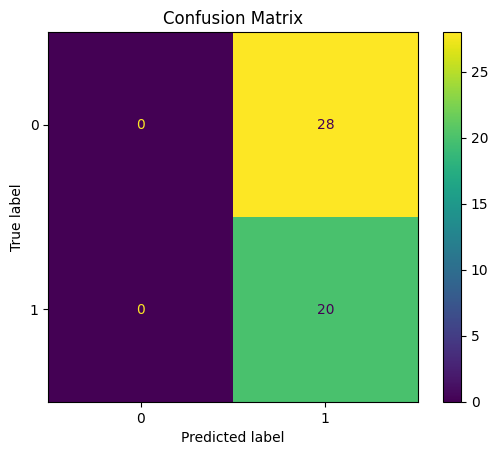

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.42      1.00      0.59        20

    accuracy                           0.42        48
   macro avg       0.21      0.50      0.29        48
weighted avg       0.17      0.42      0.25        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred_time = (best_model_time.predict(X_test_time) > 0.5).astype("int32")

test_accuracy_time = accuracy_score(y_test_time, y_pred_time)
print(f"Test Accuracy: {test_accuracy_time * 100:.2f}%")
conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)
ConfusionMatrixDisplay(conf_matrix_time).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()
report_time = classification_report(y_test_time, y_pred_time)
print("Classification Report:")
print(report_time)
